In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import collections
import numpy as np

In [27]:
df = pd.read_csv('results/sim_trace.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 15 columns):
id                2327 non-null int64
type              2327 non-null object
app               2327 non-null int64
module            2327 non-null object
message           2327 non-null object
DES.src           2327 non-null int64
DES.dst           2327 non-null int64
TOPO.src          2327 non-null int64
TOPO.dst          2327 non-null int64
module.src        2327 non-null object
service           2327 non-null float64
time_in           2327 non-null float64
time_out          2327 non-null float64
time_emit         2327 non-null float64
time_reception    2327 non-null float64
dtypes: float64(5), int64(6), object(4)
memory usage: 272.8+ KB


In [29]:
df["time_latency"] = df["time_reception"] - df["time_emit"]
df["time_wait"] = df["time_in"] - df["time_reception"]  
df["time_service"] = df["time_out"] - df["time_in"]
df["time_response"] = df["time_out"] - df["time_reception"]
df["time_total_response"] = df["time_response"] + df["time_latency"]

In [30]:
# convert index to date type in order to use resample and agreegate functions of pandas
df["date"]=df.time_in.astype('datetime64[s]')
df.index = df.date

In [31]:
df.head()

,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,...,time_in,time_out,time_emit,time_reception,time_latency,time_wait,time_service,time_response,time_total_response,date
date,,,,,,,,,,,,,,,,,,,,,
1970-01-01 01:23:54,1,COMP_M,6,6_01,M.USER.APP.6,9,7,23,0,None,...,5034.00008,5034.30008,5030.0,5034.00008,4.00008,0.0,0.3,0.3,4.30008,1970-01-01 01:23:54
1970-01-01 01:24:24,2,COMP_M,6,6_01,M.USER.APP.6,9,7,23,0,None,...,5064.00008,5064.30008,5060.0,5064.00008,4.00008,0.0,0.3,0.3,4.30008,1970-01-01 01:24:24
1970-01-01 01:24:54,3,COMP_M,6,6_01,M.USER.APP.6,9,7,23,0,None,...,5094.00008,5094.30008,5090.0,5094.00008,4.00008,0.0,0.3,0.3,4.30008,1970-01-01 01:24:54
1970-01-01 01:25:24,4,COMP_M,6,6_01,M.USER.APP.6,9,7,23,0,None,...,5124.00008,5124.30008,5120.0,5124.00008,4.00008,0.0,0.3,0.3,4.30008,1970-01-01 01:25:24
1970-01-01 01:25:54,5,COMP_M,6,6_01,M.USER.APP.6,9,7,23,0,None,...,5154.00008,5154.30008,5150.0,5154.00008,4.00008,0.0,0.3,0.3,4.30008,1970-01-01 01:25:54


In [32]:
df_resample = df.resample('100s').agg(dict(time_latency='mean'))

In [33]:
df_resample.shape

(150, 1)

In [34]:
timeLatency = df_resample.time_latency.values

In [35]:
ticks = range(len(timeLatency))

Text(0, 0.5, 'Latency time')

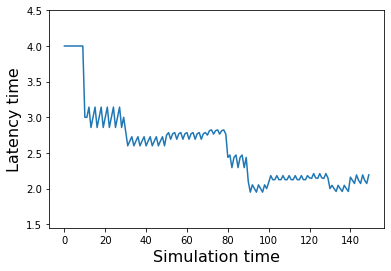

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ticks, timeLatency, '-')
ax1.set_ylim(timeLatency.min()-0.5,timeLatency.max()+0.5)
ax1.set_xlabel("Simulation time", fontsize=16)
ax1.set_ylabel("Latency time", fontsize=16)

# Hop Count

In [37]:
# Hop count
cache_distance = {}

In [39]:
G = nx.read_graphml('results/graph_binomial_tree_5')

In [40]:
print(G.nodes())

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '12', '11', '13', '14', '15', '16', '17', '18', '20', '24', '19', '21', '22', '23', '25', '26', '28', '27', '29', '30', '31']


In [41]:
def compute_distance(k):
    return nx.shortest_path_length(G,str(k[0]),str(k[1]))

In [42]:
for row in df[["TOPO.src","TOPO.dst"]].iterrows():
    k = (row[1][0],row[1][1])
    if not k in cache_distance.keys():
        cache_distance[k] = compute_distance(k)

In [43]:
x = cache_distance.values() 
counter = collections.Counter(x)
print(counter)

Counter({3: 4, 2: 2, 1: 2, 4: 1, 0: 1})


In [50]:
data_a = {}
for k in range(6):
    data_a[k] = counter[k]

In [51]:
data_a

{0: 1, 1: 2, 2: 2, 3: 4, 4: 1, 5: 0}

In [52]:
data_a = data_a.values()

In [53]:
ticks = range(6)

In [54]:
N = len(ticks)
ind = np.array(ticks)
width = 0.45

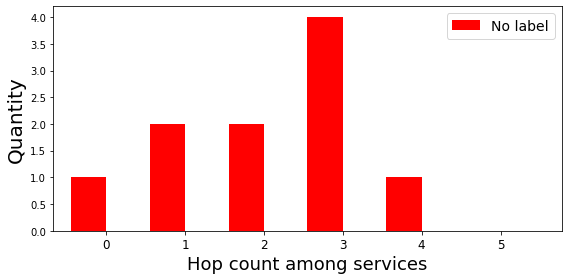

In [55]:
fig, ax = plt.subplots(figsize=(8.0,4.0))
ax.get_xaxis().set_ticks(range(0, len(ticks) * 2, 2))
r = ax.bar(ind, data_a, width, color='r')
ax.set_xticks(ind+ width/2)
ax.set_xticklabels(ticks, fontsize=12)
#ax.set_title("App")
ax.set_xlim(-width, len(ticks))
ax.plot([], c='#a6bddb', label="No LABEL",linewidth=3)
ax.set_xlabel("Hop count among services", fontsize=18)
ax.set_ylabel("Quantity", fontsize=20)
plt.legend([r],['No label'],loc="upper right",fontsize=14)
plt.tight_layout()